## LECTURE 7: Finding the Optimal Parameters for Machine Learning Models


## Objectives:
At the end of this activity, the following questions will be answered:

1. How to search for an **optimal tuning parameter**?
2. How do you search for **multiple tuning parameters** at once?
3. What do you do with those tuning parameters before making **real predictions**?

TO CHECK THE VERSION OF LIBRARIES

In [1]:
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.0 (default, Jun 28 2018, 07:39:16) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
scipy: 1.1.0
numpy: 1.15.1
matplotlib: 2.2.3
pandas: 0.23.4
sklearn: 0.19.2


TO IMPORT LIBRARIES

In [2]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd

%matplotlib inline

TO LOAD THE DATASET

In [3]:
dataset = pandas.read_excel('/Users/annecatherinevergeldedios/Downloads/RGB-Dataset.xlsx')

TO DETERMINE THE DIMENSIONS OF THE DATASET

In [4]:
print(dataset.shape)

(1065, 5)


TO PEEK AT THE DATA

In [5]:
print(dataset.head(20))

          filename           R           G           B          class
0   image01_01.png  217.534031  167.670676   15.468636  about to ripe
1   image01_02.png  216.593401  140.451902    9.794825           ripe
2   image01_03.png  172.674176  162.849902   42.471363         unripe
3   image01_04.png  177.004514  128.876667   10.220404  about to ripe
4   image01_05.png   49.932179   52.741419    3.984817         unripe
5   image02_01.png   98.627146   44.668769   11.534695           ripe
6   image02_02.png   74.695093   51.818084    6.723748  about to ripe
7   image02_03.png   32.590750   32.629311    7.606695         unripe
8   image03_01.png   87.426858  104.113142   60.853297         unripe
9   image03_02.png   70.497591   89.643752   45.623294         unripe
10  image04_01.png  104.236218   54.784258    9.188351           ripe
11  image04_02.png   79.556221   64.094670    5.856941  about to ripe
12  image04_03.png   36.406108   37.614059    9.813598         unripe
13  image05_01.png  

TO SEE THE STATISTICAL SUMMARY

In [6]:
print(dataset.describe())

                 R            G            B
count  1065.000000  1065.000000  1065.000000
mean    135.955073   101.094652    44.227691
std      42.695810    45.492777    28.717246
min      12.623125     6.641532     1.542485
25%     104.517967    63.896106    21.967157
50%     136.539490    98.131627    38.988061
75%     166.208437   135.756024    59.232105
max     238.679138   228.647370   177.470873


TO SEE THE CLASS DISTRIBUTION

In [7]:
print(dataset.groupby('Herbal').size())

Herbal
Akapulko          50
Ampalaya          50
Balbas-pusa       50
Bayabas           50
Lagundi           50
Malunggay         50
Niyog-Niyogan     50
Oregano           50
Sambong           50
Tsaang-Gubat      50
Ulasimang-Bato    50
Yerba-Buena       50
dtype: int64


TO SHOW THE UNIVARIATE PLOT (BOX and WHISKER PLOTS)

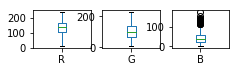

In [7]:
dataset.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False)
plot.show()

TO SHOW THE HISTOGRAM FOR THE DISTRIBUTION

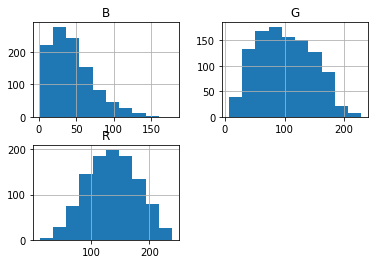

In [8]:
dataset.hist()
plot.show()

FOR THE MULTIVARIATE PLOT

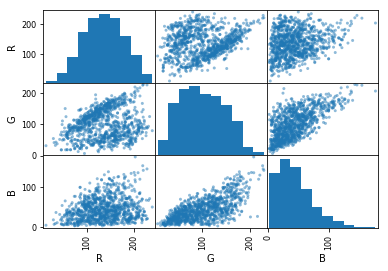

In [9]:
# For the Scatter Plot Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plot.show()

TO CREATE THE MATRIX OF INDEPENDENT VARIABLE, X

In [10]:
X = dataset.iloc[:, 1:4].values
X

array([[217.53403054, 167.67067559,  15.46863627],
       [216.5934006 , 140.4519021 ,   9.79482547],
       [172.67417605, 162.84990166,  42.47136301],
       ...,
       [202.19046307, 117.66551819,  49.47953418],
       [208.83491843,  88.76167997,  43.03484901],
       [200.61676447, 146.79767938,  53.83855695]])

TO CREATE THE MATRIX OF DEPENDENT VARIABLE, Y

In [11]:
Y = dataset.iloc[:, 4].values
Y

array(['about to ripe', 'ripe', 'unripe', ..., 'about to ripe', 'ripe',
       'about to ripe'], dtype=object)

TO ENCODE THE CATEGORICAL DATA IN THE DEPENDENT VARIABLE, Y

In [12]:
from sklearn.preprocessing import LabelEncoder 
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
Y

array([0, 1, 2, ..., 0, 1, 0])

#### TO SPLIT THE DATASET INTO TRAINING DATASET AND TESTING DATASET

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [14]:
# To Show the Shapes of X and Y Data
print(X.shape)
print(Y.shape)

(1065, 3)
(1065,)


In [15]:
# To Show the Shapes of the New X Objects
print(X_train.shape)
print(X_test.shape)

(852, 3)
(213, 3)


In [16]:
# To Show the Shapes of the New Y Objects
print(Y_train.shape)
print(Y_test.shape)

(852,)
(213,)


#### TO IMPORT DIFFERENT MACHINE LEARNING MODELS

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

###### To Build Different Machine Learning Models

In [18]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('NN', MLPClassifier()))
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=5, p=2,
             weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('NB', 

#### To Evaluate Each Model in Turn Using Default Parameters of All Models

In [19]:
# For Test Options and Evaluation Metric
from sklearn.model_selection import KFold
k_Fold = KFold (n_splits=10, shuffle=False, random_state=0)

from sklearn.model_selection import cross_val_score
seed = 0
scoring = 'accuracy'

results = []
names = []
for name, model in models:
	k_Fold = KFold(n_splits=10, shuffle=False, random_state=seed)
	cv_results = cross_val_score(model, X, Y, cv=k_Fold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.781335 (0.125705)
LDA: 0.808658 (0.139179)
KNN: 0.793643 (0.135482)
CART: 0.729836 (0.132952)
NB: 0.725948 (0.119974)
SVM: 0.329633 (0.133794)
NN: 0.796420 (0.163981)


#### To Select the Best Machine Learning Model

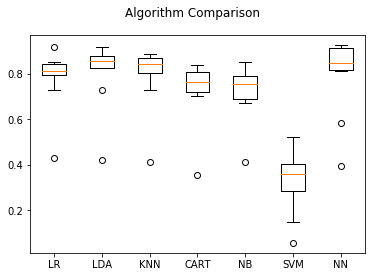

In [20]:
figure = plot.figure()
figure.suptitle('Algorithm Comparison')
axis = figure.add_subplot(111)
plot.boxplot(results)
axis.set_xticklabels(names)
plot.show()

#### A. To Create the Logistic Regression Model 

Text(0,0.5,'Frequency')

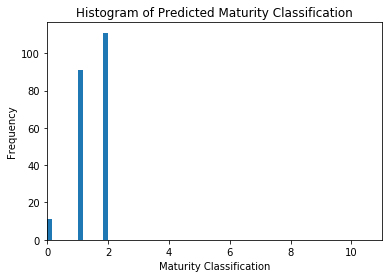

In [22]:
# To Instantiate the Model (Using the Default Parameters)
logistic_regression = LogisticRegression(random_state=0)

# To Fit the Training Dataset into Logistic Regression Model
logistic_regression.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_LogReg = logistic_regression.predict(X_test)
Y_predict_LogReg

# To Show the Histogram of Predicted Classification
plot.hist(Y_predict_LogReg, bins=12)
plot.xlim(0, 11)
plot.title('Histogram of Predicted Maturity Classification')
plot.xlabel('Maturity Classification')
plot.ylabel('Frequency')

###### To Evaluate the Performance of the Logistic Regression Model

In [23]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX:")
print(confusion_matrix(Y_test, Y_predict_LogReg))

CONFUSION MATRIX:
[[ 7  9 14]
 [ 3 77  8]
 [ 1  5 89]]


In [24]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_LogReg)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.8122



In [25]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_LogReg))

CLASSIFICATION REPORT:
             precision    recall  f1-score   support

          0       0.64      0.23      0.34        30
          1       0.85      0.88      0.86        88
          2       0.80      0.94      0.86        95

avg / total       0.80      0.81      0.79       213



#### Applying GridSearch to find the Best Parameters for the Logistic Regression Model

In [26]:
# To Import the kFold Class
from sklearn.model_selection import KFold
k_Fold = KFold (n_splits=10, shuffle=False, random_state=0)

# To Import the GridSearch Class
from sklearn.model_selection import GridSearchCV

# To Set Parameters to be Optimized Under the Logistic Regression Model
parameters = [{'C': [1, 10, 100, 1000], 'penalty': ['l1'], 'solver': ['liblinear','saga']},
              {'C': [1, 10, 100, 1000], 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag']}]
grid_search = GridSearchCV(estimator = logistic_regression,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_Fold,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, Y_train)
print(grid_search)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000], 'penalty': ['l1'], 'solver': ['liblinear', 'saga']}, {'C': [1, 10, 100, 1000], 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)


In [27]:
# To View the Results of the GridSearch
pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py

,mean_test_score,std_test_score,params
0,0.796948,0.044150,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}"
1,0.808685,0.043463,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}"
2,0.795775,0.044454,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}"
3,0.808685,0.043463,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}"
4,0.795775,0.044454,"{'C': 100, 'penalty': 'l1', 'solver': 'libline..."
5,0.808685,0.043463,"{'C': 100, 'penalty': 'l1', 'solver': 'saga'}"
6,0.795775,0.044454,"{'C': 1000, 'penalty': 'l1', 'solver': 'liblin..."
7,0.808685,0.043463,"{'C': 1000, 'penalty': 'l1', 'solver': 'saga'}"
8,0.795775,0.044454,"{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}"
9,0.795775,0.044454,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}"


In [28]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("BEST ACCURACY SCORE:")
print(best_accuracy)
print('')

print("BEST PARAMETERS:")
print(best_parameters)

BEST ACCURACY SCORE:
0.8086854460093896

BEST PARAMETERS:
{'C': 1, 'penalty': 'l1', 'solver': 'saga'}


###### To Create New Logistic Regression Model Using the Optimal Parameters

Text(0,0.5,'Frequency')

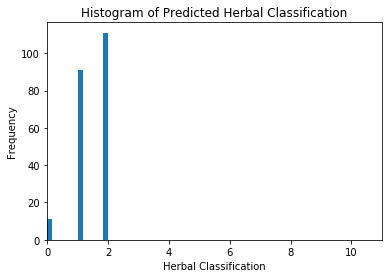

In [29]:
# To Instantiate the Model (Using the Default Parameters)
logistic_regression = LogisticRegression(C=1, penalty='l1', solver='saga', random_state=0)

# To Fit the Training Dataset into Logistic Regression Model
logistic_regression.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_LogReg = logistic_regression.predict(X_test)
Y_predict_LogReg

# To Show the Histogram of Predicted Classification
plot.hist(Y_predict_LogReg, bins=12)
plot.xlim(0, 11)
plot.title('Histogram of Predicted Herbal Classification')
plot.xlabel('Herbal Classification')
plot.ylabel('Frequency')

###### To Evaluate the Performance of the Logistic Regression Model

In [30]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX:")
print(confusion_matrix(Y_test, Y_predict_LogReg))

CONFUSION MATRIX:
[[ 7  9 14]
 [ 3 77  8]
 [ 1  5 89]]


In [31]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_LogReg)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.8122



In [32]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_LogReg))

CLASSIFICATION REPORT:
             precision    recall  f1-score   support

          0       0.64      0.23      0.34        30
          1       0.85      0.88      0.86        88
          2       0.80      0.94      0.86        95

avg / total       0.80      0.81      0.79       213



#### B. To Create the K-Nearest Neighbors Model 

Text(0,0.5,'Frequency')

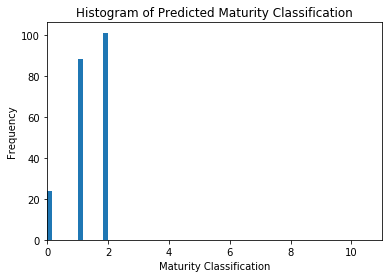

In [34]:
# To Instantiate the Model (Using the Default Parameters)
k_nearest_neighbors = KNeighborsClassifier()

# To Fit the Training Dataset into K Nearest Neighbors Model
k_nearest_neighbors.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_KNN = k_nearest_neighbors.predict(X_test)
Y_predict_KNN

# To Show the Histogram of Predicted Classification
plot.hist(Y_predict_KNN, bins=12)
plot.xlim(0, 11)
plot.title('Histogram of Predicted Maturity Classification')
plot.xlabel('Maturity Classification')
plot.ylabel('Frequency')

###### To Evaluate the Performance of the K-Nearest Neighbors Machine Model

In [35]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX:")
print(confusion_matrix(Y_test, Y_predict_KNN))

CONFUSION MATRIX:
[[13  8  9]
 [ 7 74  7]
 [ 4  6 85]]


In [36]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_KNN)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.8075



In [37]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_KNN))

CLASSIFICATION REPORT:
             precision    recall  f1-score   support

          0       0.54      0.43      0.48        30
          1       0.84      0.84      0.84        88
          2       0.84      0.89      0.87        95

avg / total       0.80      0.81      0.80       213



#### Applying GridSearch to find the Best Parameters for the K-Nearest Neighbors Machine Model

In [39]:
# To Import the kFold Class
from sklearn.model_selection import KFold
k_Fold = KFold (n_splits=10, shuffle=False, random_state=0)

# To Import the GridSearch Class
from sklearn.model_selection import GridSearchCV

# To Set Parameters to be Optimized Under the K Nearest Neighbors Model
k_range = list(range(1, 51))
weight = ['uniform', 'distance']
parameters = dict(n_neighbors=k_range, weights=weight)
grid_search = GridSearchCV(estimator = k_nearest_neighbors,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_Fold,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, Y_train)
print(grid_search)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=False),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)


In [40]:
# To View the Results of the GridSearch
pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py

,mean_test_score,std_test_score,params
0,0.772300,0.034314,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.772300,0.034314,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.732394,0.040362,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.771127,0.035924,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.799296,0.030495,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.796948,0.042018,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.786385,0.029032,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.806338,0.033267,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.803991,0.028077,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.808685,0.031594,"{'n_neighbors': 5, 'weights': 'distance'}"


In [41]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("BEST ACCURACY SCORE:")
print(best_accuracy)
print('')

print("BEST PARAMETERS:")
print(best_parameters)

BEST ACCURACY SCORE:
0.8345070422535211

BEST PARAMETERS:
{'n_neighbors': 22, 'weights': 'uniform'}


###### To Create New K-Nearest Neighbors Model Using the Optimal Parameters

Text(0,0.5,'Frequency')

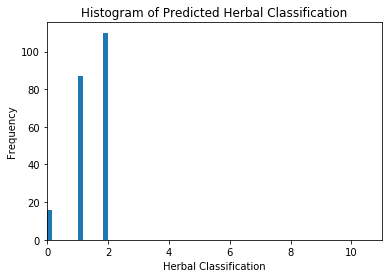

In [54]:
# To Instantiate the Model
k_nearest_neighbors = KNeighborsClassifier(n_neighbors=21, weights='uniform')

# To Fit the Training Dataset into K Nearest Neighbors Model
k_nearest_neighbors.fit(X_train, Y_train)

# To Predict the Output of the Training Dataset
Y_predict_KNN = k_nearest_neighbors.predict(X_test)
Y_predict_KNN

# To Show the Histogram of Predicted Classification
plot.hist(Y_predict_KNN, bins=12)
plot.xlim(0, 11)
plot.title('Histogram of Predicted Herbal Classification')
plot.xlabel('Herbal Classification')
plot.ylabel('Frequency')

###### To Evaluate the Performance of the K-Nearest Neighbors Machine Model

In [55]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX:")
print(confusion_matrix(Y_test, Y_predict_KNN))

CONFUSION MATRIX:
[[10  8 12]
 [ 4 75  9]
 [ 2  4 89]]


In [56]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_KNN)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.8169



In [57]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_KNN))

CLASSIFICATION REPORT:
             precision    recall  f1-score   support

          0       0.62      0.33      0.43        30
          1       0.86      0.85      0.86        88
          2       0.81      0.94      0.87        95

avg / total       0.81      0.82      0.80       213



#### C. To Create the Support Vector Machine Model 

Text(0,0.5,'Frequency')

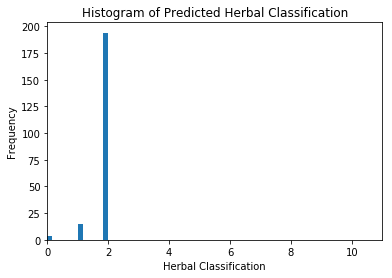

In [58]:
# To Instantiate the Model (Using the Default Parameters)
support_vector_machine = SVC(random_state=0)

# To Fit the Training Dataset into Support Vector Machine Model
support_vector_machine.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_SVM = support_vector_machine.predict(X_test)
Y_predict_SVM

# To Show the Histogram of Predicted Classification
plot.hist(Y_predict_SVM, bins=12)
plot.xlim(0, 11)
plot.title('Histogram of Predicted Herbal Classification')
plot.xlabel('Herbal Classification')
plot.ylabel('Frequency')

###### To Evaluate the Performance of the Support Vector Machine Model

In [59]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX:")
print(confusion_matrix(Y_test, Y_predict_SVM))

CONFUSION MATRIX:
[[ 3  0 27]
 [ 0 14 74]
 [ 1  1 93]]


In [60]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_SVM)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.5164



In [61]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_SVM))

CLASSIFICATION REPORT:
             precision    recall  f1-score   support

          0       0.75      0.10      0.18        30
          1       0.93      0.16      0.27        88
          2       0.48      0.98      0.64        95

avg / total       0.71      0.52      0.42       213



#### Applying GridSearch to find the Best Parameters for the Support Vector Machine Model

In [62]:
# To Import the kFold Class
from sklearn.model_selection import KFold
k_Fold = KFold (n_splits=10, shuffle=False, random_state=0)

# To Import the GridSearch Class
from sklearn.model_selection import GridSearchCV

# To Set Parameters to be Optimized Under the Support Vector Machine Model
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = support_vector_machine,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_Fold,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, Y_train)
print(grid_search)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)


In [63]:
# To View the Results of the GridSearch
pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py

,mean_test_score,std_test_score,params
0,0.830986,0.031460,"{'C': 1, 'kernel': 'linear'}"
1,0.832160,0.033507,"{'C': 10, 'kernel': 'linear'}"
2,0.836854,0.039235,"{'C': 100, 'kernel': 'linear'}"
3,0.836854,0.039235,"{'C': 1000, 'kernel': 'linear'}"
4,0.631455,0.064072,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}"
5,0.536385,0.063499,"{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}"
6,0.509390,0.062689,"{'C': 1, 'gamma': 0.3, 'kernel': 'rbf'}"
7,0.490610,0.062135,"{'C': 1, 'gamma': 0.4, 'kernel': 'rbf'}"
8,0.487089,0.062723,"{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}"
9,0.484742,0.059470,"{'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}"


In [67]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("BEST ACCURACY SCORE:")
print(best_accuracy)
print('')

print("BEST PARAMETERS:")
print(best_parameters)

BEST ACCURACY SCORE:
0.8368544600938967

BEST PARAMETERS:
{'C': 100, 'kernel': 'linear'}


###### To Create New Support Vector Machine Model Using the Optimized Parameters

Text(0,0.5,'Frequency')

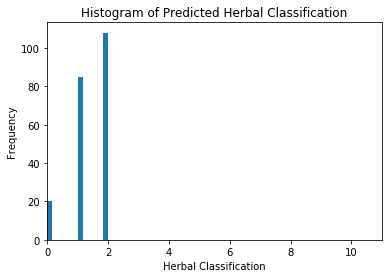

In [73]:
# To Instantiate the Model (Using the Optimized Parameters)
state_vector_machine = SVC(C=100, kernel='linear', random_state=0)

# To Fit the Training Dataset into Support Vector Machine Model
state_vector_machine.fit(X_train, Y_train)

# To Predict the Output of the Training Dataset
Y_predict_SVM = state_vector_machine.predict(X_test)
Y_predict_SVM

# To Show the Histogram of Predicted Classification
plot.hist(Y_predict_SVM, bins=12)
plot.xlim(0, 11)
plot.title('Histogram of Predicted Herbal Classification')
plot.xlabel('Herbal Classification')
plot.ylabel('Frequency')

In [74]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX:")
print(confusion_matrix(Y_test, Y_predict_SVM))

CONFUSION MATRIX:
[[12  7 11]
 [ 5 75  8]
 [ 3  3 89]]


In [75]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_SVM)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.8263



In [76]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_SVM))

CLASSIFICATION REPORT:
             precision    recall  f1-score   support

          0       0.60      0.40      0.48        30
          1       0.88      0.85      0.87        88
          2       0.82      0.94      0.88        95

avg / total       0.82      0.83      0.82       213



###### earoxas2019 & rgdeluna2018